In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
from pre_process import *

In [4]:
df = read_data('Dataset/india_vix.csv')
df.head()

,Close,PrevClose,Pchange
Date,,,
2016-01-01,14.2600,13.8700,2.81
2016-01-04,16.8350,14.2600,18.06
2016-01-05,16.7025,16.8350,-0.79
2016-01-06,16.5525,16.7025,-0.90
2016-01-07,18.9600,16.5525,14.54


In [5]:
scaler, trainX, trainY, testX, testY = scale_split_data(df)

In [6]:
epoch = 30
testSize = testY.shape[0]
trainSize = trainY.shape[0]
totalFeatures = df.shape[1]
testFeatures = testX.shape[1]
trainFeatures = trainX.shape[2]

In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, trainFeatures)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))

In [8]:
model.compile(optimizer="adam", loss="mse")
history = model.fit(trainX, trainY,  epochs=epoch,verbose=2)

Epoch 1/30
43/43 - 11s - loss: 0.0132 - 11s/epoch - 260ms/step
Epoch 2/30
43/43 - 0s - loss: 0.0103 - 457ms/epoch - 11ms/step
Epoch 3/30
43/43 - 0s - loss: 0.0065 - 446ms/epoch - 10ms/step
Epoch 4/30
43/43 - 0s - loss: 0.0011 - 479ms/epoch - 11ms/step
Epoch 5/30
43/43 - 0s - loss: 6.8869e-04 - 402ms/epoch - 9ms/step
Epoch 6/30
43/43 - 1s - loss: 7.0459e-04 - 583ms/epoch - 14ms/step
Epoch 7/30
43/43 - 0s - loss: 5.9408e-04 - 284ms/epoch - 7ms/step
Epoch 8/30
43/43 - 0s - loss: 3.6867e-04 - 278ms/epoch - 6ms/step
Epoch 9/30
43/43 - 0s - loss: 4.7647e-04 - 303ms/epoch - 7ms/step
Epoch 10/30
43/43 - 0s - loss: 4.6250e-04 - 339ms/epoch - 8ms/step
Epoch 11/30
43/43 - 0s - loss: 3.7431e-04 - 285ms/epoch - 7ms/step
Epoch 12/30
43/43 - 0s - loss: 3.2092e-04 - 275ms/epoch - 6ms/step
Epoch 13/30
43/43 - 0s - loss: 3.5485e-04 - 290ms/epoch - 7ms/step
Epoch 14/30
43/43 - 0s - loss: 4.6905e-04 - 300ms/epoch - 7ms/step
Epoch 15/30
43/43 - 0s - loss: 3.4342e-04 - 294ms/epoch - 7ms/step
Epoch 16/30
43/

In [9]:
scaled_pred = model.predict(testX)

15/15 [==============================] - 2s 5ms/step


In [10]:
predData = np.zeros((testSize, totalFeatures))
for i in range(testSize):
        predData[i][0] = scaled_pred[i][0]
predData = scaler.inverse_transform(predData)

realData = np.zeros((testSize, totalFeatures))
for i in range(testSize):
        realData[i][0] = testY[i]
realData = scaler.inverse_transform(realData)

<module 'matplotlib.pyplot' from '/home/bluebooks/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

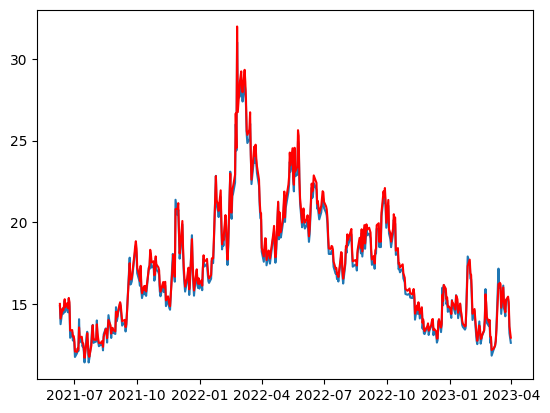

In [11]:
plt.plot(df.index[-testSize:], predData[:,0])
plt.plot(df.index[-testSize:], realData[:,0],'r')
plt

In [12]:
mae = mean_absolute_error(predData, realData)
rmse = sqrt(mean_squared_error(predData, realData))
mape = mean_absolute_percentage_error(predData, realData)

print("MAE : ", mae)
print("RMSE : ", rmse)
print("MAPE: ", (100 - mape))

MAE :  0.09200895196057825
RMSE :  0.17840577236010732
MAPE:  99.99473210741031
